In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import learning_curve, validation_curve, GridSearchCV
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import SGDRegressor,GammaRegressor,Lasso,GammaRegressor,ElasticNet,Ridge
from sklearn.linear_model import RANSACRegressor,HuberRegressor, BayesianRidge,LinearRegression
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
dataset=pd.read_csv('/content/concrete-compressive-strength.zip')

In [ ]:
dataset

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [ ]:
dataset.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age (day)',
       'Concrete compressive strength '],
      dtype='object')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Cement                          1030 non-null   float64
 1   Blast Furnace Slag              1030 non-null   float64
 2   Fly Ash                         1030 non-null   float64
 3   Water                           1030 non-null   float64
 4   Superplasticizer                1030 non-null   float64
 5   Coarse Aggregate                1030 non-null   float64
 6   Fine Aggregate                  1030 non-null   float64
 7   Age (day)                       1030 non-null   int64  
 8   Concrete compressive strength   1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [ ]:
dataset.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete compressive strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [ ]:
dataset.isnull().sum()

,0
Cement,0
Blast Furnace Slag,0
Fly Ash,0
Water,0
Superplasticizer,0
Coarse Aggregate,0
Fine Aggregate,0
Age (day),0
Concrete compressive strength,0


In [ ]:
col=dataset.columns.to_list()
col

['Cement',
 'Blast Furnace Slag',
 'Fly Ash',
 'Water',
 'Superplasticizer',
 'Coarse Aggregate',
 'Fine Aggregate',
 'Age (day)',
 'Concrete compressive strength ']

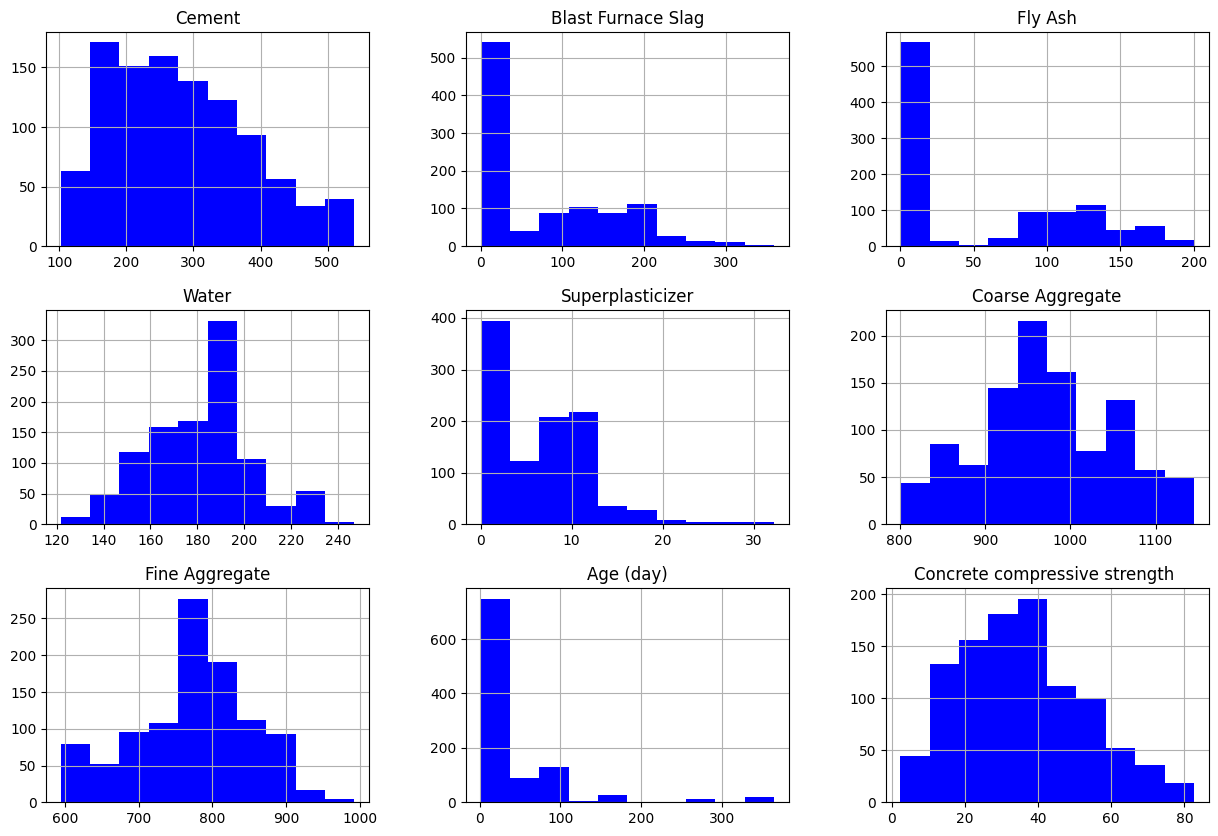

In [ ]:
dataset.hist(figsize=(15,10),color='blue')
plt.show()

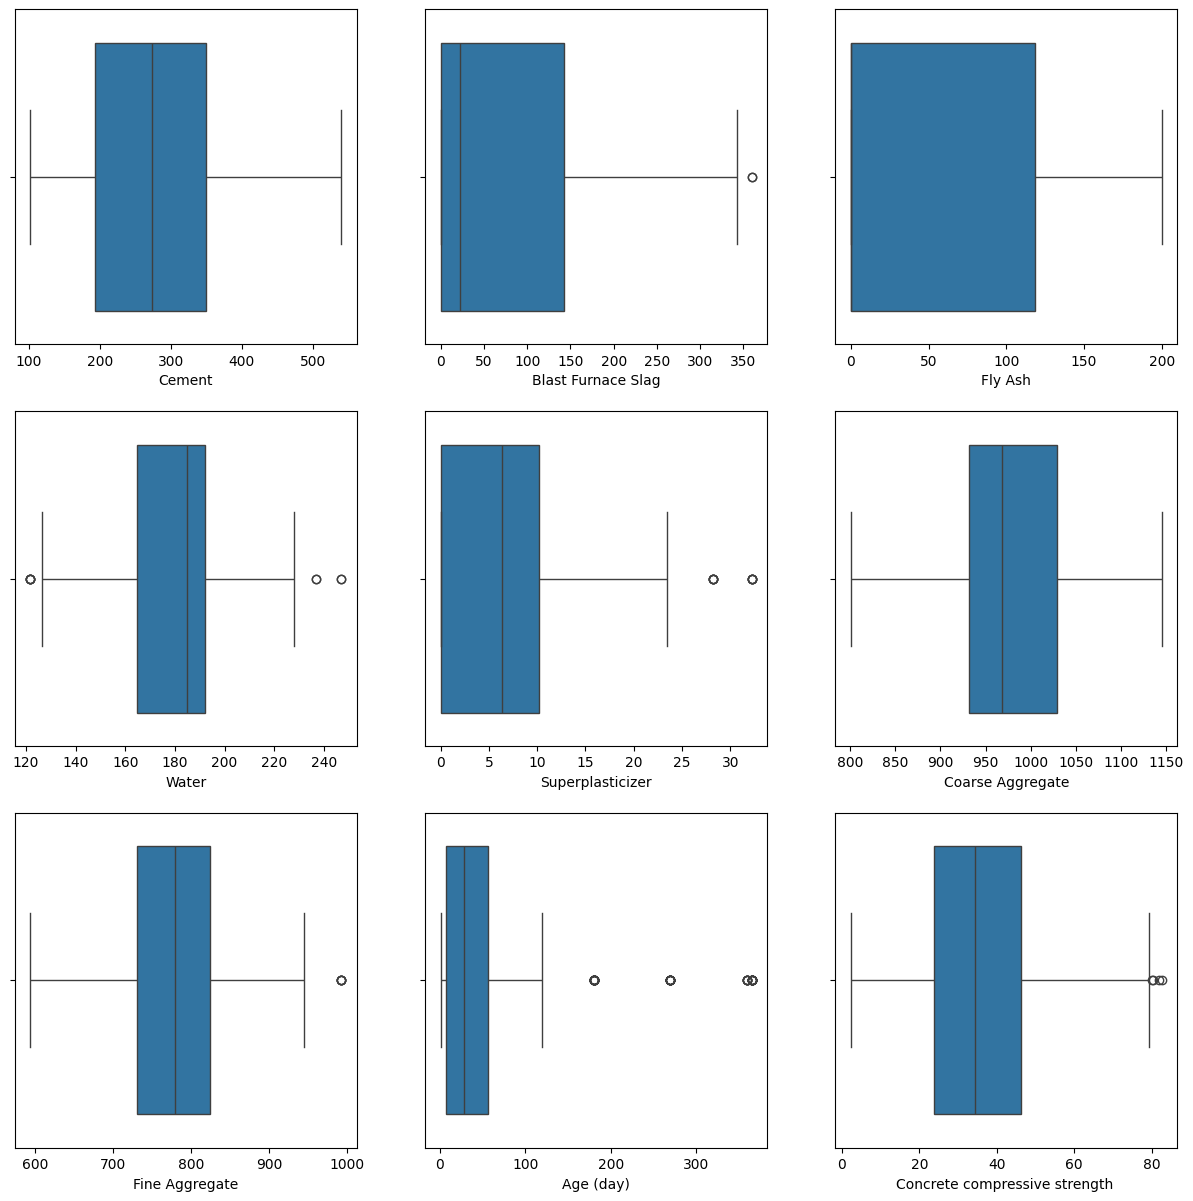

In [ ]:
i=1
plt.figure(figsize = (15,20))
for col in dataset.columns:
    plt.subplot(4,3,i)
    sns.boxplot(x = dataset[col], data = dataset)
    i+=1

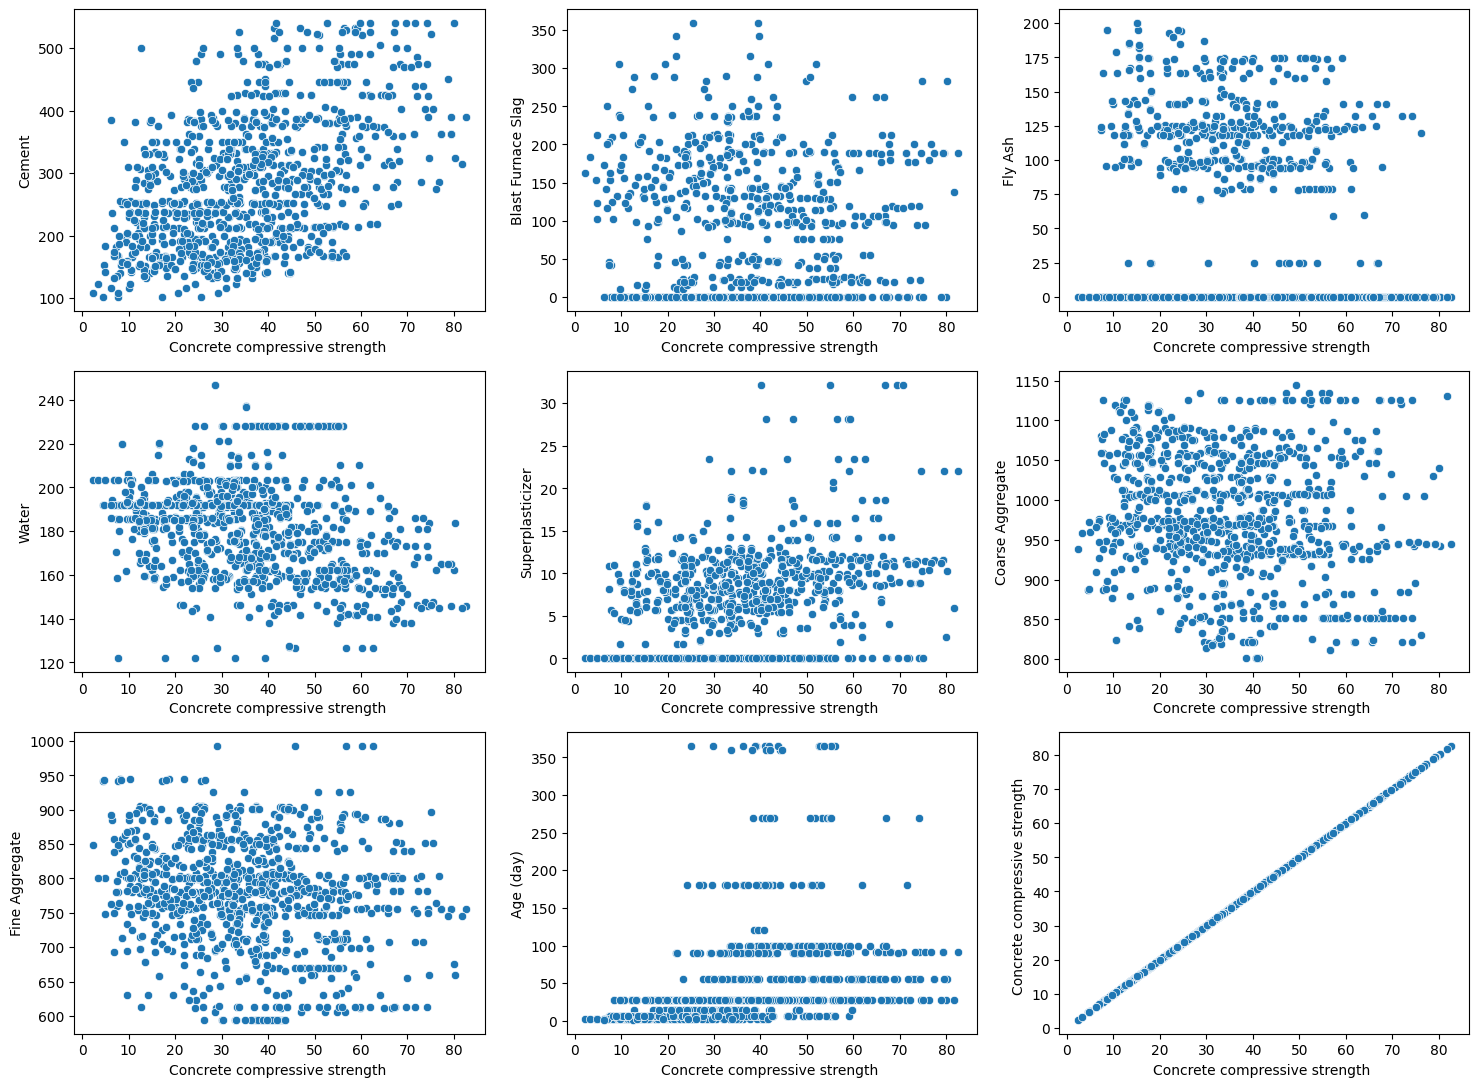

In [ ]:
i=1
plt.figure(figsize = (18,18))
for col in dataset.columns:
    plt.subplot(4,3,i)
    sns.scatterplot(data=dataset,x='Concrete compressive strength ',y=col)
    i+=1

<Axes: >

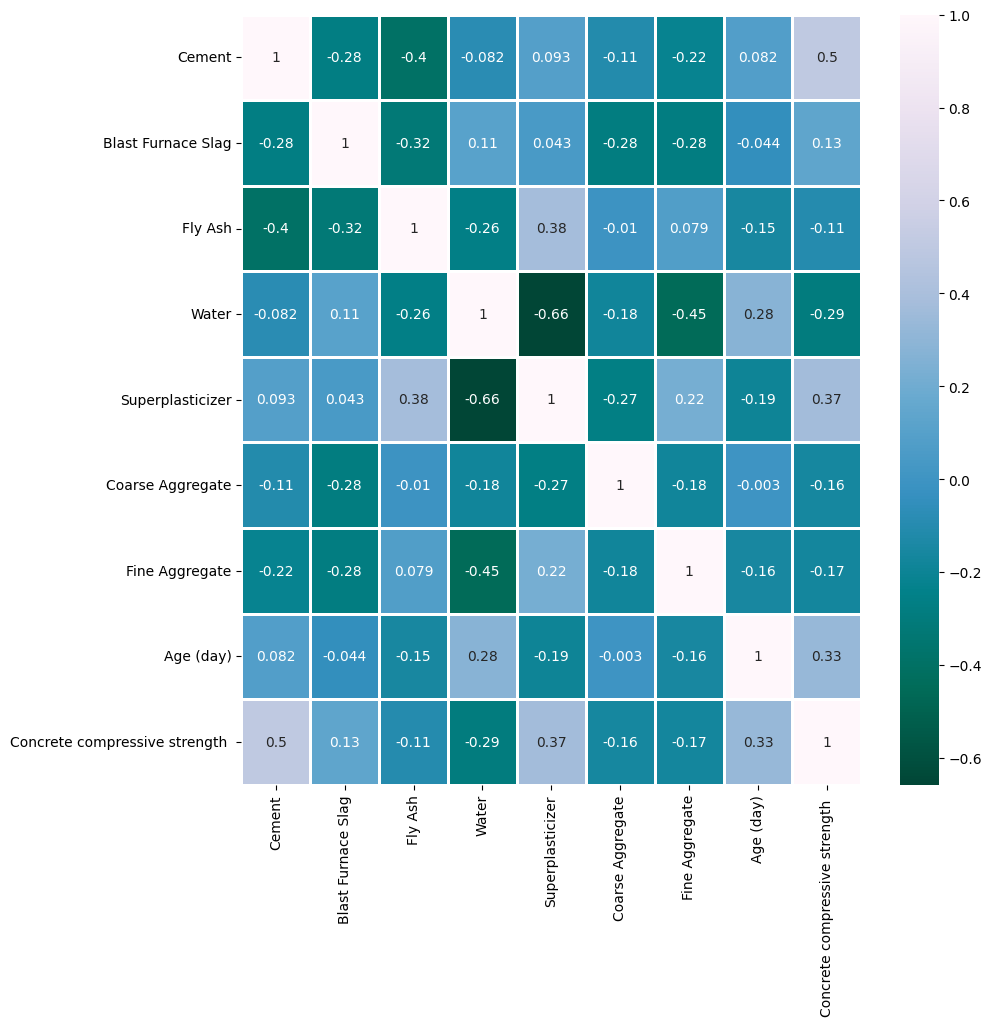

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr(),linewidths=1,cmap='PuBuGn_r',annot=True)

<Axes: >

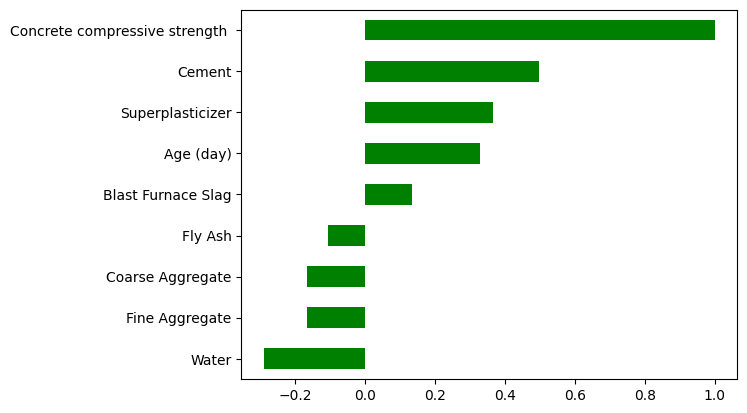

In [ ]:
correlation=dataset.corr()['Concrete compressive strength '].sort_values()
correlation.plot(kind='barh',color='green')

In [ ]:
X=dataset.drop(columns='Concrete compressive strength ')
Y=dataset[['Concrete compressive strength ']]

In [ ]:
X

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day)
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


In [ ]:
Y

,Concrete compressive strength
0,79.986111
1,61.887366
2,40.269535
3,41.052780
4,44.296075
...,...
1025,44.284354
1026,31.178794
1027,23.696601
1028,32.768036


In [ ]:
sc=StandardScaler()
X_scaled=sc.fit_transform(X)
X_scaled=pd.DataFrame(X_scaled,columns=X.columns)

In [ ]:
X_scaled

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day)
0,2.477918,-0.856886,-0.847132,-0.916663,-0.620225,0.863160,-1.217658,-0.279733
1,2.477918,-0.856886,-0.847132,-0.916663,-0.620225,1.056170,-1.217658,-0.279733
2,0.491443,0.795533,-0.847132,2.175367,-1.038944,-0.526514,-2.240913,3.553066
3,0.491443,0.795533,-0.847132,2.175367,-1.038944,-0.526514,-2.240913,5.057677
4,-0.790432,0.678414,-0.847132,0.488805,-1.038944,0.070531,0.647908,4.978487
...,...,...,...,...,...,...,...,...
1025,-0.045623,0.488241,0.564569,-0.092122,0.451695,-1.323003,-0.065874,-0.279733
1026,0.392837,-0.856886,0.960095,0.676201,0.702927,-1.994679,0.496916,-0.279733
1027,-1.270057,0.759585,0.850661,0.521599,-0.017270,-1.036061,0.080127,-0.279733
1028,-1.168580,1.308072,-0.847132,-0.279518,0.853666,0.214646,0.191188,-0.279733


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,Y,test_size=.30,random_state=0)

In [ ]:
x_train

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day)
772,0.965325,-0.856886,-0.847132,0.207711,-1.038944,0.953232,-0.431500,-0.612331
997,0.276042,0.799011,-0.847132,-0.640255,0.635932,-0.754266,0.379616,-0.279733
724,0.276042,-0.856886,-0.847132,0.488805,-1.038944,0.502874,0.704063,0.702224
167,1.855649,0.520709,-0.847132,-0.021848,0.451695,-1.554615,0.098845,0.718062
764,0.994045,-0.856886,-0.847132,0.207711,-1.038944,-0.089024,-0.132011,-0.675683
...,...,...,...,...,...,...,...,...
277,-0.285245,-0.856886,1.001836,0.322491,-0.075891,0.713899,-0.197774,0.163731
763,0.994045,-0.856886,-0.847132,0.207711,-1.038944,-0.089024,-0.132011,-0.707359
835,-1.313138,-0.856886,1.888722,-1.104059,1.975833,-0.384973,0.878765,-0.279733
559,-0.397923,3.310688,-0.847132,0.193657,-1.038944,-0.402987,-1.363659,-0.279733


In [ ]:
x_test

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day)
747,2.094983,-0.856886,-0.847132,0.863597,-1.038944,1.956885,-2.003817,-0.675683
718,-1.518008,1.275604,-0.847132,1.027568,-1.038944,-0.189389,0.330949,-0.612331
175,0.779602,1.334743,-0.847132,-0.780801,0.903912,-0.363099,-0.221858,0.718062
828,2.305597,-0.856886,-0.847132,-1.666246,-1.038944,-0.989739,1.527657,-0.279733
713,-1.188684,1.879751,-0.847132,0.488805,-1.038944,-0.482765,0.095102,-0.675683
...,...,...,...,...,...,...,...,...
156,0.049153,1.472734,-0.847132,-1.727150,0.836917,0.407656,0.375873,0.163731
222,-1.101662,-0.856886,1.705342,-0.239228,-0.286925,1.102493,0.081250,0.163731
665,-1.035510,0.488241,-0.847132,0.488805,-1.038944,-0.336077,1.038492,-0.612331
210,-0.490115,-0.856886,1.002462,0.651371,-0.263477,0.726766,-0.187042,-0.501465


In [ ]:
lr=LinearRegression()
sgd=SGDRegressor()
lasso=Lasso()
ridge=Ridge()
rf=RandomForestRegressor()
dt=DecisionTreeRegressor()
gboost=GradientBoostingRegressor()
bagging=BaggingRegressor()
adboost=AdaBoostRegressor()
knn=KNeighborsRegressor()
etr=ExtraTreesRegressor()
gamma=GammaRegressor()

In [ ]:
algo=[lr,sgd,lasso,ridge,rf,dt,gboost,bagging,adboost,knn,etr]

In [ ]:
model=[]
accuracy_test=[]
accuracy_train=[]
for i in range(len(algo)):
    algo[i].fit(x_train,y_train)
    accuracy_train.append(algo[i].score(x_train,y_train))
    accuracy_test.append(algo[i].score(x_test,y_test))
    model.append(algo[i])

In [ ]:
mod=pd.DataFrame([model,accuracy_train,accuracy_test]).T
mod.columns=['model','score_train','score_test']
mod

,model,score_train,score_test
0,LinearRegression(),0.606594,0.635277
1,SGDRegressor(),0.605701,0.635532
2,Lasso(),0.560683,0.590061
3,Ridge(),0.606561,0.635528
4,"(DecisionTreeRegressor(max_features=1.0, rando...",0.982932,0.890383
5,DecisionTreeRegressor(),0.995928,0.765854
6,([DecisionTreeRegressor(criterion='friedman_ms...,0.9509,0.899261
7,(DecisionTreeRegressor(random_state=1024682461...,0.973254,0.863502
8,"(DecisionTreeRegressor(max_depth=3, random_sta...",0.816905,0.775133
9,KNeighborsRegressor(),0.822696,0.657434


In [ ]:
regressor=ExtraTreesRegressor()

In [ ]:
rs=[]
score=[]
for i in range(1,200,1):
    x_train,x_test,y_train,y_test=train_test_split(X_scaled,Y,test_size=.20,random_state=i)
    regressor.fit(x_train,y_train)
    score.append(regressor.score(x_test,y_test))
    rs.append(i)

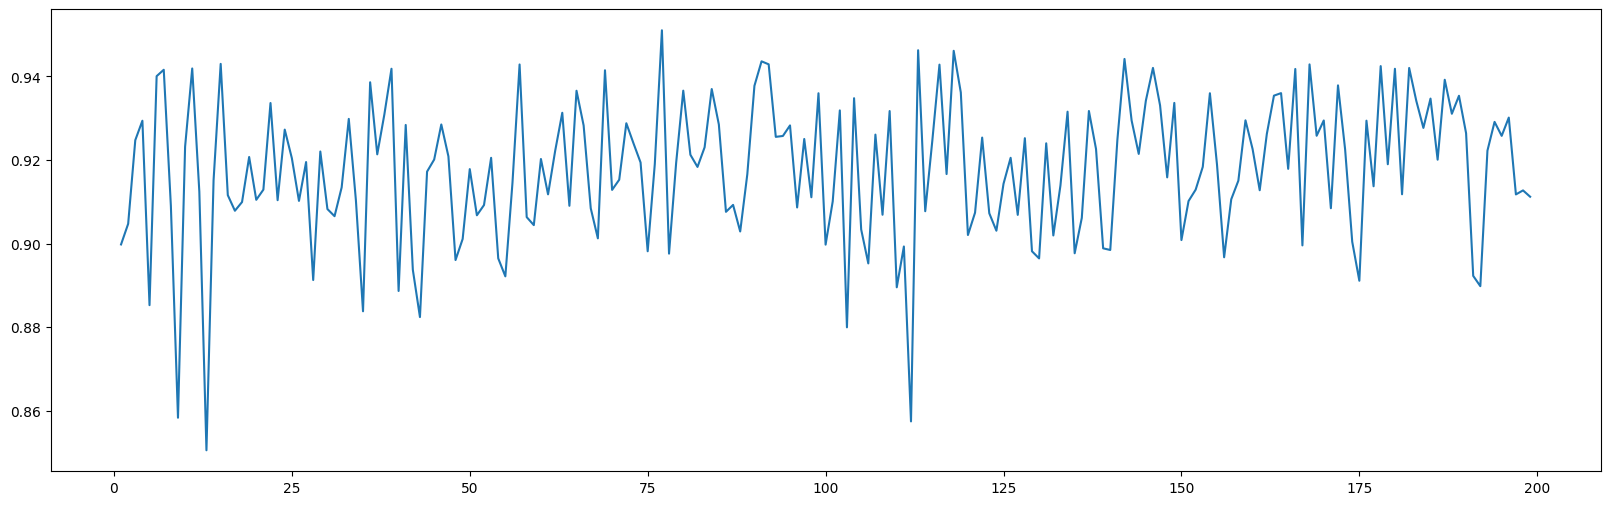

In [ ]:
plt.figure(figsize=(20,6))
plt.plot(rs,score)

In [ ]:
for i in range(len(score)):
    print(rs[i],score[i])

1 0.8998035289413766
2 0.9047425950389985
3 0.9247568496325838
4 0.9294048755625839
5 0.8852753414444829
6 0.9400643935044528
7 0.9415971717897036
8 0.9090522813566546
9 0.8583430313735725
10 0.9231975024609304
11 0.9419067332424498
12 0.912405681034718
13 0.8505559060362754
14 0.9151599506619453
15 0.9430054761742379
16 0.9115957567996473
17 0.9078651197239671
18 0.9099467847010765
19 0.9207252062569377
20 0.9104797957090609
21 0.9129145640177218
22 0.9336399548448646
23 0.9103911632249473
24 0.9272826828496653
25 0.920448288668974
26 0.9102161875820786
27 0.9195167625512182
28 0.8912889937718876
29 0.9220395035538949
30 0.9082656278360814
31 0.9065637788044804
32 0.9134572442033184
33 0.9298435635867599
34 0.9103745728923281
35 0.8838096465504702
36 0.9386049337894066
37 0.9213641414776632
38 0.9309174392267796
39 0.9418410009499631
40 0.8886697971967281
41 0.928393621730196
42 0.8937444875226268
43 0.8824280472750377
44 0.9172275293127349
45 0.9201217718256108
46 0.9285106186740368


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,Y,test_size=.30,random_state=77)
regressor2=ExtraTreesRegressor()

In [ ]:
regressor2.fit(x_train,y_train)
regressor2.score(x_train,y_train)

0.995684875788065

In [ ]:
model = regressor2

In [ ]:
model.score(x_test,y_test)

0.9432612200356171

In [ ]:
y_test_pred=model.predict(x_test)

In [ ]:
y_test1=y_test.copy()
y_test1['pred']=y_test_pred

In [ ]:
y_test1.corr()

,Concrete compressive strength,pred
Concrete compressive strength,1.000000,0.972647
pred,0.972647,1.000000


In [ ]:
import joblib

joblib.dump(regressor, 'model.pkl')
joblib.dump(sc, 'scaler.pkl')

['scaler.pkl']

In [ ]:
from sklearn.metrics import  mean_squared_error,r2_score
mean_squared_error(y_test1[ 'Concrete compressive strength '],y_test1['pred'])

16.671634668449673

In [ ]:
rsme=np.sqrt(mean_squared_error(y_test1[ 'Concrete compressive strength '],y_test1['pred']))
rsme

4.083091312773898

In [ ]:
r2_score(y_test1[ 'Concrete compressive strength '],y_test1['pred'])

0.9432612200356171

<BarContainer object of 8 artists>

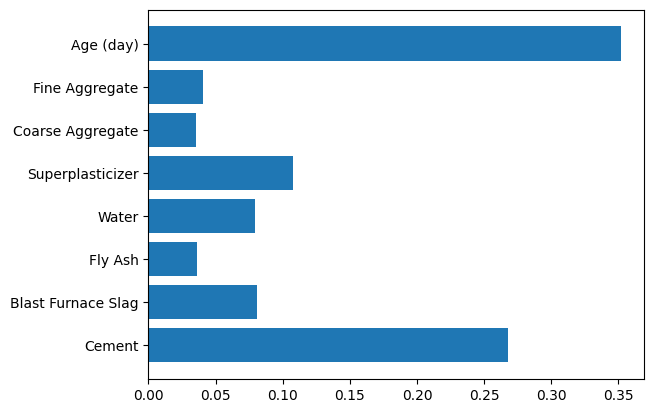

In [ ]:
plt.barh(X.columns,model.feature_importances_)

In [ ]:
random_indices = np.random.choice(dataset.index, size=10, replace=False)
sampled_X = X.loc[random_indices]
sampled_Y = Y.loc[random_indices]

# loaded_scaler = joblib.load('scaler.pkl')
sampled_X_scaled = sc.transform(sampled_X)

predictions = model.predict(sampled_X_scaled)

results = pd.DataFrame(sampled_X, columns=X.columns)
results['Actual Label'] = sampled_Y
results['Predicted Label'] = predictions

styled_table = results.style.set_properties(**{
    'font-family': 'Arial',
    'font-size': '12px',
    'border': '1px solid black',
    'text-align': 'center',
}).set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', '#f2f2f2'), ('color', 'black')]},
    {'selector': 'tbody td', 'props': [('background-color', '#f9f9f9'), ('color', 'blue')]},
]).hide(axis='index')

styled_table

Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Actual Label,Predicted Label
213.740000,0.000000,174.740000,154.790000,10.160000,1053.500000,776.350000,14,33.729166,33.245981
192.000000,288.000000,0.000000,192.000000,0.000000,929.800000,716.100000,7,21.480625,21.480625
313.000000,0.000000,0.000000,178.000000,8.000000,1000.000000,822.000000,28,25.096926,25.457453
266.000000,114.000000,0.000000,228.000000,0.000000,932.000000,670.000000,365,52.908320,52.908320
425.000000,106.300000,0.000000,153.500000,16.500000,852.100000,887.100000,56,64.300532,64.300532
165.000000,0.020000,143.570000,163.810000,0.000000,1005.600000,900.900000,3,14.396259,14.396259
249.100000,0.000000,98.750000,158.110000,12.800000,987.760000,889.010000,56,42.030457,45.060911
310.000000,0.000000,0.000000,192.000000,0.000000,970.000000,850.000000,28,27.923778,27.923778
190.340000,0.000000,125.180000,166.610000,9.880000,1079.000000,798.900000,100,33.563692,33.563692
362.600000,189.000000,0.000000,164.900000,11.600000,944.700000,755.800000,56,77.297154,77.297154
